In [43]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential

In [44]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [45]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_valid = X_valid.reshape(-1, 784)

In [46]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=[784,]))
model.add(Dropout(0,2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0,2))
model.add(Dense(10, activation='softmax'))

In [47]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=512,
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
108/108 [==============================] - 2s 13ms/step - loss: 0.6858 - accuracy: 0.7685 - val_loss: 0.4479 - val_accuracy: 0.8484
Epoch 2/50
108/108 [==============================] - 1s 12ms/step - loss: 0.4393 - accuracy: 0.8451 - val_loss: 0.4358 - val_accuracy: 0.8494
Epoch 3/50
108/108 [==============================] - 1s 11ms/step - loss: 0.3910 - accuracy: 0.8613 - val_loss: 0.3773 - val_accuracy: 0.8676
Epoch 4/50
108/108 [==============================] - 1s 11ms/step - loss: 0.3667 - accuracy: 0.8697 - val_loss: 0.3616 - val_accuracy: 0.8744
Epoch 5/50
108/108 [==============================] - 1s 11ms/step - loss: 0.3419 - accuracy: 0.8775 - val_loss: 0.3490 - val_accuracy: 0.8752
Epoch 6/50
108/108 [==============================] - 1s 11ms/step - loss: 0.3256 - accuracy: 0.8831 - val_loss: 0.3406 - val_accuracy: 0.8756
Epoch 7/50
108/108 [==============================] - 1s 11ms/step - loss: 0.3046 - accuracy: 0.8902 - val_loss: 0.3119 - val_accuracy: 0.8860

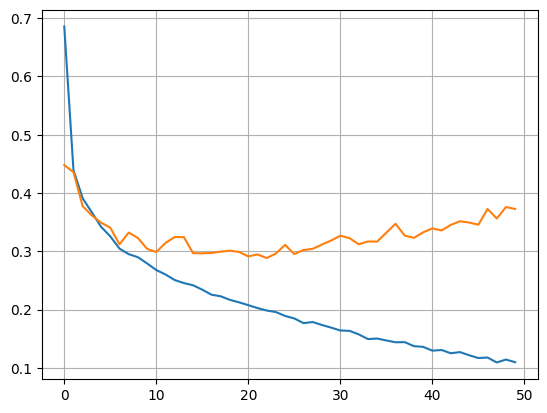

In [50]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="valid loss")
plt.grid()

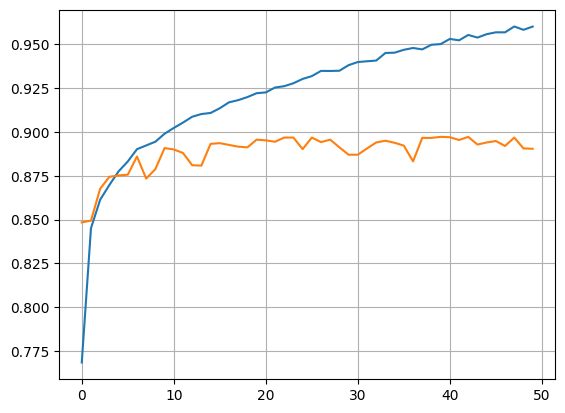

In [51]:
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="valid accuracy")
plt.grid()

In [ ]:
# Модель показує хороший результат навчання вже при 20 епохах
# При збільшенні кількості епох - accuracy стає вище